In [1]:
# Import Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import datetime
import pickle
warnings.filterwarnings('ignore')

In [2]:
# Read the models
with open('model_lr_pipe2.pkl', 'rb') as file_1:
    model_lr_pipe2=pickle.load(file_1)  
    
with open('scaler.pkl', 'rb') as file_2:
    scaler=pickle.load(file_2)

In [3]:
# Read the original data
df = pd.read_csv('sample_dataset_timeseries_noarea.csv')
df['week_start_date']=pd.to_datetime(df['week_start_date'])
df['week_end_date']=pd.to_datetime(df['week_end_date'])
week_quantity=df.groupby(['week_start_date'])['quantity'].sum().reset_index(name='quantity')
week_quantity_ts=week_quantity[['week_start_date', 'quantity']][1:].set_index('week_start_date')

In [4]:
# Check the timeseries data
week_quantity_ts

,quantity
week_start_date,
2022-01-03,3839557
2022-01-10,4138934
2022-01-17,4149077
2022-01-24,4824273
2022-01-31,4008027
...,...
2023-03-06,4775638
2023-03-13,4787111
2023-03-20,4757590


In [5]:
# Define the forecasting model
def forecasting(week):
  # :param `week` : how many weeks to predict

    week_quantity_ts_forecast = week_quantity_ts.squeeze().copy()
    window = 2
    for i in range(week):
        X = np.array(week_quantity_ts_forecast[-window:].values).reshape(1, -1)
        X_scaled = scaler.transform(X)
        new_idx=week_quantity_ts_forecast.index[-1]+datetime.timedelta(days=7)
        week_quantity_ts_forecast[new_idx] = round(model_lr_pipe2.predict(X_scaled)[0])
    return week_quantity_ts_forecast

In [6]:
# Forecast for the Next 10 weeks

quantity_forecast = forecasting(10).to_frame()
quantity_forecast['quantity'][66:]

week_start_date
2023-04-10    4922060
2023-04-17    4610199
2023-04-24    4755694
2023-05-01    4697724
2023-05-08    4726473
2023-05-15    4716087
2023-05-22    4721940
2023-05-29    4720217
2023-06-05    4721479
2023-06-12    4721248
Name: quantity, dtype: int64

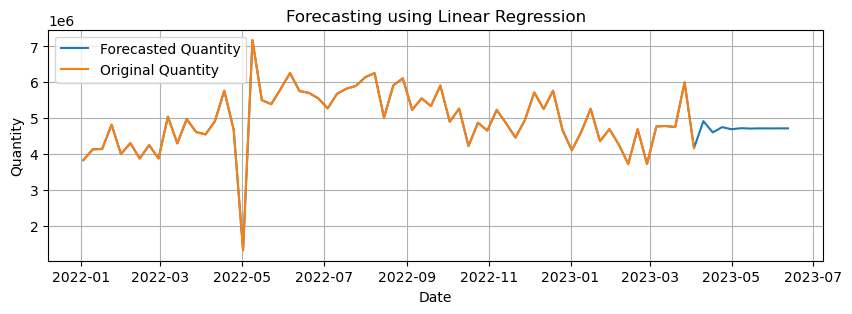

In [8]:
# Forecasting 10 weeks ahead from real data
fig, ax = plt.subplots(nrows=1,figsize=(10,3))
ax.plot(quantity_forecast)
ax.plot(week_quantity_ts['quantity'])
ax.set_title('Forecasting using Linear Regression')
ax.set_xlabel('Date')
ax.set_ylabel('Quantity')
ax.legend(['Forecasted Quantity', 'Original Quantity'])
ax.grid()

It is predicted that in the next 10 weeks, the number of products sold will be in the range of 4M-5M per week (with an error of +/- 510K).